# Create Intermediate Raster Result

In [1]:
from datetime import datetime
import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
User Id:             c8c105d6-924b-40df-bca5-631bc1f73972
Session Id:          4b395f64-a46e-47e3-b8f0-50d0b6c11159
Session valid until: 2025-05-11T12:10:57.301Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": "ndvi"
        }
    }
})
workflow

1e415c9c-55f3-51a2-b50b-b5053d1debbb

## Query raster via WMS

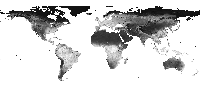

In [5]:

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.wms_get_map_as_image(
    ge.QueryRectangleWithResolution(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

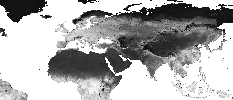

In [6]:
workflow.wms_get_map_as_image(
    ge.QueryRectangleWithResolution(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

## Store part of the world as new dataset

In [7]:
task = workflow.save_as_dataset(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(
            datetime.strptime('2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z"),
            datetime.strptime('2014-06-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")),
    ),
    name=session.user_id+":part_ndvi",
    display_name="Part NDVI",
    description="Test Description",
)
task

TimeInterval(start=2014-04-01T12:00:00.000000, end=2014-06-01T12:00:00.000000) 1396353600000 1401624000000


UUID('a161f50f-29f7-41e7-9d7b-cc78dd30f86f')

In [8]:
task_status_info = task.wait_for_finish(1)
task_status_info

a161f50f-29f7-41e7-9d7b-cc78dd30f86f
a161f50f-29f7-41e7-9d7b-cc78dd30f86f
status=running, time_started=2025-04-11 12:10:57.938000+00:00, pct_complete=0.00%, estimated_time_remaining=? (Â± ?), info=None, task_type=create-dataset, description=Creating dataset Part NDVI from workflow 1e415c9c-55f3-51a2-b50b-b5053d1debbb
a161f50f-29f7-41e7-9d7b-cc78dd30f86f
status=completed, time_started=2025-04-11 12:10:57.938000+00:00, info={'dataset': 'c8c105d6-924b-40df-bca5-631bc1f73972:part_ndvi', 'upload': '26f166dc-5777-49ba-b333-517f7e9ee21b'}, time_total=00:00:00, task_type=create-dataset, description=Creating dataset Part NDVI from workflow 1e415c9c-55f3-51a2-b50b-b5053d1debbb


TaskStatusInfo(status='completed', time_started=datetime.datetime(2025, 4, 11, 12, 10, 57, 938000, tzinfo=datetime.timezone.utc), info = {'dataset': 'c8c105d6-924b-40df-bca5-631bc1f73972:part_ndvi', 'upload': '26f166dc-5777-49ba-b333-517f7e9ee21b'}, time_total = '00:00:00', task_type='create-dataset', description='Creating dataset Part NDVI from workflow 1e415c9c-55f3-51a2-b50b-b5053d1debbb')

In [9]:
stored_dataset = ge.StoredDataset.from_response(task_status_info.info)
stored_dataset

StoredDataset(dataset_name=c8c105d6-924b-40df-bca5-631bc1f73972:part_ndvi, upload_id=26f166dc-5777-49ba-b333-517f7e9ee21b)

In [10]:
new_workflow = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": str(stored_dataset.dataset_name)
        }
    }
})
new_workflow

13dd05ab-aa55-5eca-9868-715144d1b019

## WMS request from new dataset

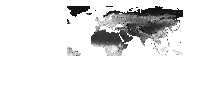

In [11]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangleWithResolution(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

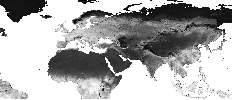

In [12]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangleWithResolution(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

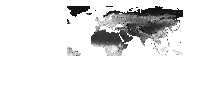

In [13]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangleWithResolution(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

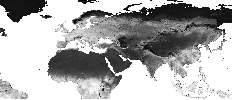

In [14]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangleWithResolution(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)

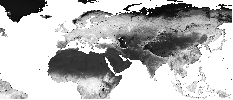

In [15]:
time = datetime.strptime(
    '2014-05-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangleWithResolution(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
    ),
    raster_colorizer=ge.SingleBandRasterColorizer(band=0, band_colorizer=ge.colorizer.Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255)))
)